**Importing Libraries**

In [60]:
import re
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

**Reading laptops_dataset File**

In [61]:
laptops_df = pd.read_csv("laptops_dataset.csv")
laptops_df

,Index,Standing screen display size,Screen Resolution,Max Screen Resolution,Processor,RAM,Memory Speed,Hard Drive,Graphics Coprocessor,Chipset Brand,...,Item Package Quantity,Display Style,Special Features,Usage,Included Components,Batteries Included?,Batteries Required?,Battery Cell Type,Warranty Description,Price($)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1699.00
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,919.08
2,3,‎15.6 Inches,‎1920 x 1080 pixels,‎1920x1080,‎4.1 GHz ryzen_3,‎8 GB LPDDR5,‎3200 MHz,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.99
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,799.00
4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1333.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3983,10354,‎16 Inches,‎1920x1200,‎1920 x 1200 Pixels,‎2.5 GHz celeron,‎LPDDR4,NaN,‎128 GB Emmc,‎Intel UHD Graphics 600,‎Intel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,399.99
3984,10356,‎11.6 Inches,‎1366 x 768 (HD),‎1366 x 768 (HD),‎1.1 GHz celeron,‎4 GB DDR4,‎2400 MHz,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.00
3985,10368,‎11.6 Inches,NaN,NaN,‎800 MHz celeron_n,‎4 GB,NaN,‎128 GB,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212.99
3986,10380,‎10 Inches,NaN,NaN,‎intel_atom,‎2 GB DDR3,‎1.33 GHz,‎SSD,‎Intel GMA HD Graphics,‎Intel,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.99


**<h1>📌 Feature Selection</h1>**

**Calculate the number of NaNs in each column**

In [62]:
nan_counts = laptops_df.isna().sum()

for column, count in nan_counts.items():
    print(f"{column}: {count}")

Index: 0
Standing screen display size: 56
Screen Resolution: 154
Max Screen Resolution: 401
Processor: 140
RAM: 178
Memory Speed: 1738
Hard Drive: 135
Graphics Coprocessor: 439
Chipset Brand: 131
Card Description: 137
Graphics Card Ram Size: 1914
Wireless Type: 668
Number of USB 3.0 Ports: 1659
Average Battery Life (in hours): 2271
Brand: 46
Series: 309
Item model number: 400
Hardware Platform: 1449
Operating System: 159
Item Weight: 62
Product Dimensions: 148
Item Dimensions  LxWxH: 150
Color: 661
Processor Brand: 146
Number of Processors: 170
Computer Memory Type: 446
Flash Memory Size: 1320
Hard Drive Interface: 840
Optical Drive Type: 2022
Voltage: 1613
Batteries: 1231
Power Source: 1850
Number of USB 2.0 Ports: 2760
Hard Drive Rotational Speed: 3385
National Stock Number: 3942
Rear Webcam Resolution: 3653
Package Dimensions: 3899
Audio-out Ports (#): 3859
Manufacturer: 3979
Language: 3984
ASIN: 3980
Date First Available: 3980
Department: 3986
Is Discontinued By Manufacturer: 3985


**Filter columns with fewer NaNs**

In [63]:
selected_columns = [
    "Brand", "Standing screen display size", "Processor", "RAM", 
    "Memory Speed", "Hard Drive", "Graphics Coprocessor", 
    "Chipset Brand", "Card Description", "Processor Brand", 
    "Operating System", "Item Weight", "Price($)"
]

laptops_df_cleaned = laptops_df[selected_columns].dropna()
laptops_df_cleaned

,Brand,Standing screen display size,Processor,RAM,Memory Speed,Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight,Price($)
2,‎acer,‎15.6 Inches,‎4.1 GHz ryzen_3,‎8 GB LPDDR5,‎3200 MHz,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,‎3.92 pounds,269.99
5,‎HP,‎14 Inches,‎1.1 GHz celeron_n,‎8 GB DDR4,‎2400 MHz,‎64 GB SSD,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,‎3.24 pounds,249.99
10,‎HP,‎14 Inches,‎2.6 GHz celeron,‎4 GB DDR4,‎2.6 GHz,‎64 GB SSD,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,‎4.45 pounds,178.40
11,‎HP,‎14,‎2.6 GHz celeron_n,‎4 GB DDR4,‎2400 MHz,‎64 GB Emmc,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,‎0.634 ounces,132.00
15,‎Apple,‎13.3 Inches,‎1.8 GHz core_i5,‎8 GB LPDDR3,‎1.8 GHz,‎128 GB,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,‎3 pounds,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,‎SAMSUNG,‎11.6 Inches,‎1.1 GHz celeron_n3450,‎4 GB DDR4,‎1 GHz,‎512 GB HDD,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,‎3.5 pounds,104.00
3981,‎ASUS,‎10.1 Inches,‎2 GHz rockchip_rk3288,‎4 GB DDR3,‎2400 MHz,‎16 GB Embedded MultiMediaCard,‎ARM Mali-T860 MP4,‎Rockchip,‎Dedicated,‎Rockchip,‎Chrome OS,‎2 pounds,219.00
3984,‎ASUS,‎11.6 Inches,‎1.1 GHz celeron,‎4 GB DDR4,‎2400 MHz,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,‎Integrated,‎Intel,‎Windows 10 Home,‎2.2 pounds,219.00
3986,‎ASUS,‎10 Inches,‎intel_atom,‎2 GB DDR3,‎1.33 GHz,‎SSD,‎Intel GMA HD Graphics,‎Intel,‎Integrated,‎Intel,‎Windows 8,‎1 pounds,13.99


**<h1>📌 Data Preprocessing and Data Cleaning</h1>**

**Convert Memory Speed to Hz**

In [64]:
def convert_to_hz(speed):
    speed = "".join(filter(str.isprintable, speed))
    speed = speed.strip()
    if "GHz" in speed:
        return float(speed.replace("GHz", "").strip()) * 1e9
    elif "MHz" in speed:
        return float(speed.replace("MHz", "").strip()) * 1e6
    elif "KHz" in speed:
        return float(speed.replace("KHz", "").strip()) * 1e3
    else:
        return float(speed)

laptops_df_cleaned["Memory Speed"] = laptops_df_cleaned["Memory Speed"].apply(convert_to_hz)
laptops_df_cleaned = laptops_df_cleaned.rename(columns = {"Memory Speed": "Memory Speed(Hz)"})
laptops_df_cleaned

,Brand,Standing screen display size,Processor,RAM,Memory Speed(Hz),Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight,Price($)
2,‎acer,‎15.6 Inches,‎4.1 GHz ryzen_3,‎8 GB LPDDR5,3.200000e+09,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,‎3.92 pounds,269.99
5,‎HP,‎14 Inches,‎1.1 GHz celeron_n,‎8 GB DDR4,2.400000e+09,‎64 GB SSD,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,‎3.24 pounds,249.99
10,‎HP,‎14 Inches,‎2.6 GHz celeron,‎4 GB DDR4,2.600000e+09,‎64 GB SSD,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,‎4.45 pounds,178.40
11,‎HP,‎14,‎2.6 GHz celeron_n,‎4 GB DDR4,2.400000e+09,‎64 GB Emmc,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,‎0.634 ounces,132.00
15,‎Apple,‎13.3 Inches,‎1.8 GHz core_i5,‎8 GB LPDDR3,1.800000e+09,‎128 GB,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,‎3 pounds,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,‎SAMSUNG,‎11.6 Inches,‎1.1 GHz celeron_n3450,‎4 GB DDR4,1.000000e+09,‎512 GB HDD,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,‎3.5 pounds,104.00
3981,‎ASUS,‎10.1 Inches,‎2 GHz rockchip_rk3288,‎4 GB DDR3,2.400000e+09,‎16 GB Embedded MultiMediaCard,‎ARM Mali-T860 MP4,‎Rockchip,‎Dedicated,‎Rockchip,‎Chrome OS,‎2 pounds,219.00
3984,‎ASUS,‎11.6 Inches,‎1.1 GHz celeron,‎4 GB DDR4,2.400000e+09,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,‎Integrated,‎Intel,‎Windows 10 Home,‎2.2 pounds,219.00
3986,‎ASUS,‎10 Inches,‎intel_atom,‎2 GB DDR3,1.330000e+09,‎SSD,‎Intel GMA HD Graphics,‎Intel,‎Integrated,‎Intel,‎Windows 8,‎1 pounds,13.99


**Convert Weight to Pounds**

In [65]:
def clean_and_convert_weight(weight_str):
    cleaned = re.sub(r"[^\d.]+", "", weight_str).lower()
    
    if "ounce" in weight_str:
        cleaned = float(cleaned) * 0.0625
    
    return float(cleaned)

laptops_df_cleaned["Item Weight"] = laptops_df_cleaned["Item Weight"].apply(clean_and_convert_weight)
laptops_df_cleaned = laptops_df_cleaned.rename(columns = {"Item Weight": "Item Weight(pounds)"})
laptops_df_cleaned

,Brand,Standing screen display size,Processor,RAM,Memory Speed(Hz),Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($)
2,‎acer,‎15.6 Inches,‎4.1 GHz ryzen_3,‎8 GB LPDDR5,3.200000e+09,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,3.920000,269.99
5,‎HP,‎14 Inches,‎1.1 GHz celeron_n,‎8 GB DDR4,2.400000e+09,‎64 GB SSD,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,3.240000,249.99
10,‎HP,‎14 Inches,‎2.6 GHz celeron,‎4 GB DDR4,2.600000e+09,‎64 GB SSD,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,4.450000,178.40
11,‎HP,‎14,‎2.6 GHz celeron_n,‎4 GB DDR4,2.400000e+09,‎64 GB Emmc,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,0.039625,132.00
15,‎Apple,‎13.3 Inches,‎1.8 GHz core_i5,‎8 GB LPDDR3,1.800000e+09,‎128 GB,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,3.000000,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,‎SAMSUNG,‎11.6 Inches,‎1.1 GHz celeron_n3450,‎4 GB DDR4,1.000000e+09,‎512 GB HDD,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,3.500000,104.00
3981,‎ASUS,‎10.1 Inches,‎2 GHz rockchip_rk3288,‎4 GB DDR3,2.400000e+09,‎16 GB Embedded MultiMediaCard,‎ARM Mali-T860 MP4,‎Rockchip,‎Dedicated,‎Rockchip,‎Chrome OS,2.000000,219.00
3984,‎ASUS,‎11.6 Inches,‎1.1 GHz celeron,‎4 GB DDR4,2.400000e+09,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,‎Integrated,‎Intel,‎Windows 10 Home,2.200000,219.00
3986,‎ASUS,‎10 Inches,‎intel_atom,‎2 GB DDR3,1.330000e+09,‎SSD,‎Intel GMA HD Graphics,‎Intel,‎Integrated,‎Intel,‎Windows 8,1.000000,13.99


**Remove 'Inches' from the column "Standing screen display size"**

In [66]:
laptops_df_cleaned["Standing screen display size"] = laptops_df_cleaned["Standing screen display size"].str.replace(" Inches", "")
laptops_df_cleaned["Standing screen display size"] = laptops_df_cleaned["Standing screen display size"].str.replace(r"[^\d\.]", "", regex = True)
laptops_df_cleaned["Standing screen display size"] = laptops_df_cleaned["Standing screen display size"].astype(float).round(2)
laptops_df_cleaned = laptops_df_cleaned.rename(columns = {"Standing screen display size": "Standing screen display size(Inches)"})
laptops_df_cleaned

,Brand,Standing screen display size(Inches),Processor,RAM,Memory Speed(Hz),Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($)
2,‎acer,15.6,‎4.1 GHz ryzen_3,‎8 GB LPDDR5,3.200000e+09,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,3.920000,269.99
5,‎HP,14.0,‎1.1 GHz celeron_n,‎8 GB DDR4,2.400000e+09,‎64 GB SSD,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,3.240000,249.99
10,‎HP,14.0,‎2.6 GHz celeron,‎4 GB DDR4,2.600000e+09,‎64 GB SSD,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,4.450000,178.40
11,‎HP,14.0,‎2.6 GHz celeron_n,‎4 GB DDR4,2.400000e+09,‎64 GB Emmc,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,0.039625,132.00
15,‎Apple,13.3,‎1.8 GHz core_i5,‎8 GB LPDDR3,1.800000e+09,‎128 GB,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,3.000000,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,‎SAMSUNG,11.6,‎1.1 GHz celeron_n3450,‎4 GB DDR4,1.000000e+09,‎512 GB HDD,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,3.500000,104.00
3981,‎ASUS,10.1,‎2 GHz rockchip_rk3288,‎4 GB DDR3,2.400000e+09,‎16 GB Embedded MultiMediaCard,‎ARM Mali-T860 MP4,‎Rockchip,‎Dedicated,‎Rockchip,‎Chrome OS,2.000000,219.00
3984,‎ASUS,11.6,‎1.1 GHz celeron,‎4 GB DDR4,2.400000e+09,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,‎Integrated,‎Intel,‎Windows 10 Home,2.200000,219.00
3986,‎ASUS,10.0,‎intel_atom,‎2 GB DDR3,1.330000e+09,‎SSD,‎Intel GMA HD Graphics,‎Intel,‎Integrated,‎Intel,‎Windows 8,1.000000,13.99


**Clean RAM Column**

In [67]:
def clean_ram(value):
    match = re.search(r"\d+", value)
    if match:
        ram_value = int(match.group())
        if "1 TB" in value:
            return 1024
        elif ram_value % 2 != 0:
            return int(math.pow(2, math.ceil(math.log2(ram_value))))
        else:
            return ram_value

laptops_df_cleaned["RAM"] = laptops_df_cleaned["RAM"].apply(clean_ram)
laptops_df_cleaned.dropna(subset = ["RAM"], inplace = True)
laptops_df_cleaned = laptops_df_cleaned.rename(columns = {"RAM": "RAM(GB)"})
laptops_df_cleaned

,Brand,Standing screen display size(Inches),Processor,RAM(GB),Memory Speed(Hz),Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($)
2,‎acer,15.6,‎4.1 GHz ryzen_3,8,3.200000e+09,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,3.920000,269.99
5,‎HP,14.0,‎1.1 GHz celeron_n,8,2.400000e+09,‎64 GB SSD,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,3.240000,249.99
10,‎HP,14.0,‎2.6 GHz celeron,4,2.600000e+09,‎64 GB SSD,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,4.450000,178.40
11,‎HP,14.0,‎2.6 GHz celeron_n,4,2.400000e+09,‎64 GB Emmc,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,0.039625,132.00
15,‎Apple,13.3,‎1.8 GHz core_i5,8,1.800000e+09,‎128 GB,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,3.000000,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3980,‎SAMSUNG,11.6,‎1.1 GHz celeron_n3450,4,1.000000e+09,‎512 GB HDD,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,3.500000,104.00
3981,‎ASUS,10.1,‎2 GHz rockchip_rk3288,4,2.400000e+09,‎16 GB Embedded MultiMediaCard,‎ARM Mali-T860 MP4,‎Rockchip,‎Dedicated,‎Rockchip,‎Chrome OS,2.000000,219.00
3984,‎ASUS,11.6,‎1.1 GHz celeron,4,2.400000e+09,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,‎Integrated,‎Intel,‎Windows 10 Home,2.200000,219.00
3986,‎ASUS,10.0,‎intel_atom,2,1.330000e+09,‎SSD,‎Intel GMA HD Graphics,‎Intel,‎Integrated,‎Intel,‎Windows 8,1.000000,13.99


**Clean Processor Column**

In [68]:
laptops_df_cleaned["Processor"] = laptops_df_cleaned["Processor"].apply(lambda x: re.search(r"(\d+\.\d+)\s*GHz", x).group(1) if re.search(r"(\d+\.\d+)\s*GHz", x) else None)
laptops_df_cleaned.dropna(subset = ["Processor"], inplace = True)
laptops_df_cleaned["Processor"] = laptops_df_cleaned["Processor"].astype(float)
laptops_df_cleaned = laptops_df_cleaned.rename(columns = {"Processor": "Processor(GHz)"})
laptops_df_cleaned

,Brand,Standing screen display size(Inches),Processor(GHz),RAM(GB),Memory Speed(Hz),Hard Drive,Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($)
2,‎acer,15.6,4.1,8,3.200000e+09,‎128 GB SSD,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,3.920000,269.99
5,‎HP,14.0,1.1,8,2.400000e+09,‎64 GB SSD,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,3.240000,249.99
10,‎HP,14.0,2.6,4,2.600000e+09,‎64 GB SSD,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,4.450000,178.40
11,‎HP,14.0,2.6,4,2.400000e+09,‎64 GB Emmc,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,0.039625,132.00
15,‎Apple,13.3,1.8,8,1.800000e+09,‎128 GB,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,3.000000,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,‎ASUS,11.6,1.6,4,2.480000e+09,‎32 GB Embedded MultiMediaCard,‎Intel HD Graphics 400,‎Intel,‎Integrated,‎Intel,‎Chrome OS,2.600000,199.99
3977,‎ASUS,10.1,1.8,4,1.800000e+09,‎16 GB Emmc,‎ARM Mali-T764,‎ARM,‎Integrated,‎Rockchip,‎Chrome OS,2.000000,193.00
3980,‎SAMSUNG,11.6,1.1,4,1.000000e+09,‎512 GB HDD,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,3.500000,104.00
3984,‎ASUS,11.6,1.1,4,2.400000e+09,‎32 GB Emmc,‎Intel,‎Intel® UHD Graphics 600,‎Integrated,‎Intel,‎Windows 10 Home,2.200000,219.00


**Clean Hard Drive Column**

In [69]:
def convert_hard_drive_size(size_str):
    match = re.search(r"(\d+\.?\d*)", size_str)
    if match:
        value = float(match.group(1))
        if ("TB" in size_str) and (not "GB" in size_str):
            value *= 1000
        elif "MB" in size_str:
            value /= 1024
        elif "GB" not in size_str:
            if value > 10 and value < 500:
                return value
            elif value < 10:
                value *= 1000
            else:
                value /= 1000000000
        return value
    return None

laptops_df_cleaned["Hard Drive"] = laptops_df_cleaned["Hard Drive"].apply(convert_hard_drive_size)
laptops_df_cleaned = laptops_df_cleaned.dropna().reset_index(drop = True)
laptops_df_cleaned = laptops_df_cleaned.rename(columns = {"Hard Drive": "Hard Drive(GB)"})
laptops_df_cleaned

,Brand,Standing screen display size(Inches),Processor(GHz),RAM(GB),Memory Speed(Hz),Hard Drive(GB),Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($)
0,‎acer,15.6,4.1,8,3.200000e+09,128.0,‎AMD Radeon Graphics,‎AMD,‎Integrated,‎AMD,‎Windows 11 S,3.920000,269.99
1,‎HP,14.0,1.1,8,2.400000e+09,64.0,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Windows 11 Home,3.240000,249.99
2,‎HP,14.0,2.6,4,2.600000e+09,64.0,‎Intel,‎Intel,‎Integrated,‎Intel,‎Windows 11,4.450000,178.40
3,‎HP,14.0,2.6,4,2.400000e+09,64.0,‎Intel UHD Graphics 600,‎Intel,‎Integrated,‎Intel,‎Chrome OS,0.039625,132.00
4,‎Apple,13.3,1.8,8,1.800000e+09,128.0,‎Intel HD Graphics 6000,‎Intel,‎Integrated,‎Intel,‎macOS 10.12 Sierra,3.000000,174.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,‎ASUS,11.6,2.8,4,2.400000e+09,64.0,‎Intel UHD Graphics,‎Intel,‎Integrated,‎Intel,‎Windows 10 Pro,2.360000,181.99
1585,‎ASUS,11.6,1.6,4,2.480000e+09,32.0,‎Intel HD Graphics 400,‎Intel,‎Integrated,‎Intel,‎Chrome OS,2.600000,199.99
1586,‎ASUS,10.1,1.8,4,1.800000e+09,16.0,‎ARM Mali-T764,‎ARM,‎Integrated,‎Rockchip,‎Chrome OS,2.000000,193.00
1587,‎SAMSUNG,11.6,1.1,4,1.000000e+09,512.0,‎Intel UHD Graphics 600,‎Intel,‎UHD Graphics 600,‎Intel,‎Chrome OS,3.500000,104.00


**<h1>📌 Random Forest Model</h1>**

**Understanding Cleaned Dataframe**

In [70]:
laptops_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 1589 non-null   object 
 1   Standing screen display size(Inches)  1589 non-null   float64
 2   Processor(GHz)                        1589 non-null   float64
 3   RAM(GB)                               1589 non-null   int64  
 4   Memory Speed(Hz)                      1589 non-null   float64
 5   Hard Drive(GB)                        1589 non-null   float64
 6   Graphics Coprocessor                  1589 non-null   object 
 7   Chipset Brand                         1589 non-null   object 
 8   Card Description                      1589 non-null   object 
 9   Processor Brand                       1589 non-null   object 
 10  Operating System                      1589 non-null   object 
 11  Item Weight(pound

In [71]:
laptops_df_cleaned.describe()

,Standing screen display size(Inches),Processor(GHz),RAM(GB),Memory Speed(Hz),Hard Drive(GB),Item Weight(pounds),Price($)
count,1589.000000,1589.000000,1589.000000,1.589000e+03,1589.000000,1589.000000,1589.000000
mean,14.972026,2.701246,15.700441,4.480794e+10,615.515772,3.924764,485.625758
std,6.335969,1.136559,106.865229,3.557609e+11,4545.218547,1.715258,509.537368
min,8.000000,1.040000,2.000000,2.100000e+00,0.062500,0.000625,33.880000
25%,14.000000,1.800000,4.000000,2.400000e+09,128.000000,3.100000,190.000000
50%,15.600000,2.600000,8.000000,2.666000e+09,256.000000,3.700000,325.000000
75%,15.600000,3.500000,16.000000,3.200000e+09,512.000000,4.520000,568.990000
max,156.000000,10.800000,4096.000000,5.600000e+12,128000.000000,29.000000,5299.000000


**Random Forest Model**

In [72]:
numerical_features = ["Standing screen display size(Inches)", "Processor(GHz)", "RAM(GB)", "Memory Speed(Hz)", "Hard Drive(GB)", "Item Weight(pounds)"]
categorical_features = ["Brand", "Graphics Coprocessor", "Chipset Brand", "Card Description", "Processor Brand", "Operating System"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_features)
    ])

pipeline = Pipeline(steps = [
    ("preprocessor", preprocessor),
    ("poly", PolynomialFeatures(degree = 2, include_bias = False)),
    ("regressor", RandomForestRegressor(n_estimators = 100, random_state = 42))
])

X = laptops_df_cleaned.drop(columns = "Price($)")
y = laptops_df_cleaned["Price($)"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipeline.fit(X_train, y_train)

# Predict
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training score: {pipeline.score(X_train, y_train)}")
print(f"Test score: {pipeline.score(X_test, y_test)}")

print(f"Training Mean Squared Error (MSE): {train_mse}")
print(f"Test Mean Squared Error (MSE): {test_mse}")

print(f"Training R-squared (R^2): {train_r2}")
print(f"Test R-squared (R^2): {test_r2}")

Training score: 0.9527494344291838
Test score: 0.7160879585402733
Training Mean Squared Error (MSE): 12412.15086319908
Test Mean Squared Error (MSE): 69847.1617871392
Training R-squared (R^2): 0.9527494344291838
Test R-squared (R^2): 0.7160879585402733


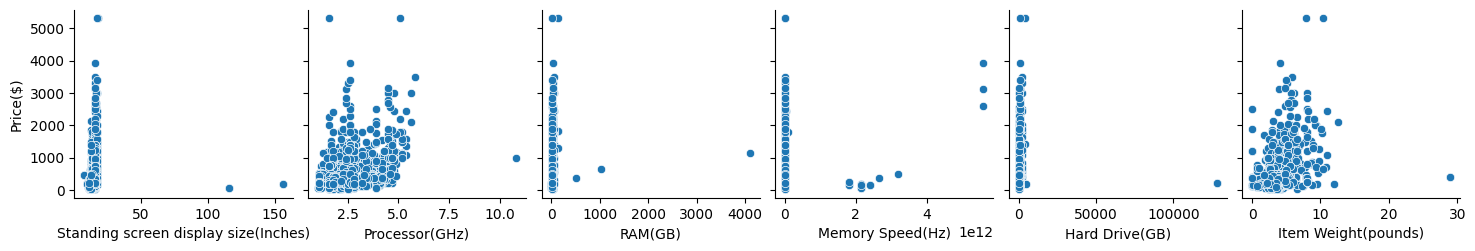

In [73]:
# Pairplot
sns.pairplot(laptops_df_cleaned, y_vars = "Price($)", x_vars = numerical_features)
plt.show()

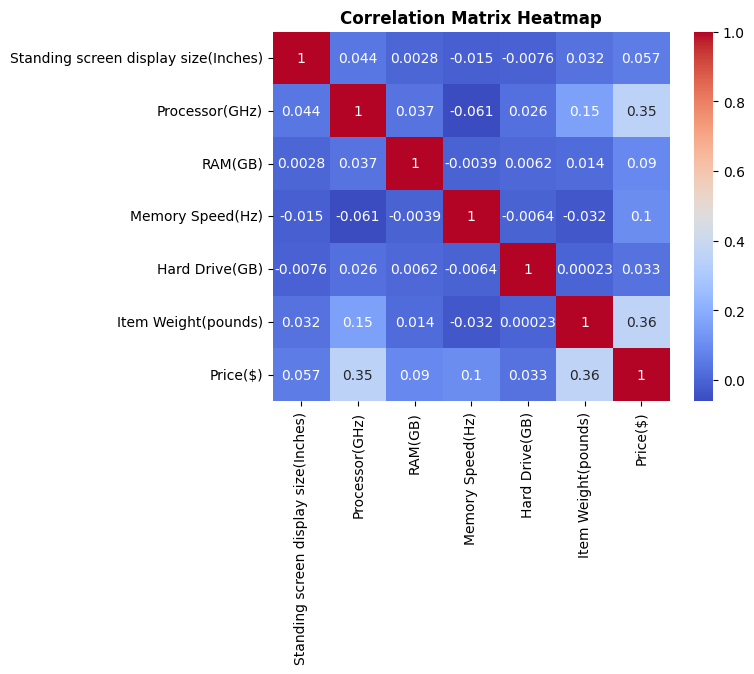

In [74]:
# Heatmap
numerical_data = laptops_df_cleaned[numerical_features + ["Price($)"]]
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix Heatmap", fontweight = "bold")
plt.show()

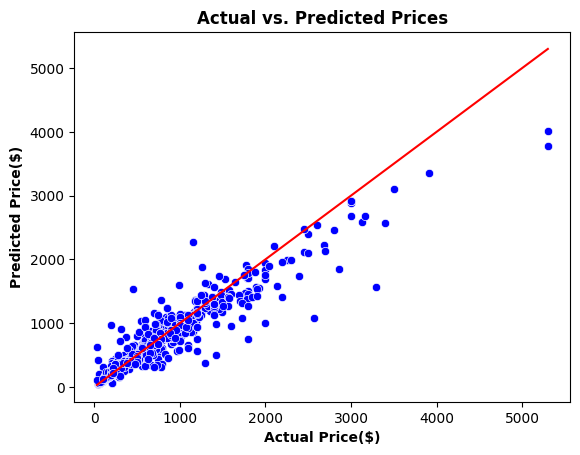

In [75]:
# Scatter plot
y_pred = pipeline.predict(X)
laptops_df_cleaned["Predicted Price($)"] = y_pred
sns.scatterplot(x = "Price($)", y = "Predicted Price($)", color = "blue", data = laptops_df_cleaned)
plt.plot([min(y), max(y)], [min(y), max(y)], color = "red")
plt.xlabel("Actual Price($)", fontweight = "bold")
plt.ylabel("Predicted Price($)", fontweight = "bold")
plt.title("Actual vs. Predicted Prices", fontweight = "bold")
plt.show()

In [76]:
# Scatter plot using Plotly
scatter_trace = go.Scatter(x = laptops_df_cleaned["Price($)"], y = laptops_df_cleaned["Predicted Price($)"], mode = "markers", marker = dict(color = "blue"), name = "Actual vs Predicted")
diagonal_trace = go.Scatter(x = laptops_df_cleaned["Price($)"], y = laptops_df_cleaned["Price($)"], mode = "lines", line = dict(color = "red", width = 2), name = "Diagonal Line (y = x)")

layout = go.Layout(
    title = "Actual vs Predicted Prices (Random Forest)",
    xaxis = dict(title = "Actual Price ($)", titlefont = dict(size = 14)),
    yaxis = dict(title = "Predicted Price ($)", titlefont = dict(size = 14)),
    showlegend = True
)
fig = go.Figure(data=[scatter_trace, diagonal_trace], layout = layout)

fig.show()

**<h1>📌 Test Random Forest</h1>**

In [77]:
# Sample Data
new_data = pd.DataFrame({
   "Brand": ["acer", "HP", "HP"],
   "Standing screen display size(Inches)": [15.6, 14.0, 14.0],
   "Processor(GHz)": [4.1, 1.1, 2.6],
   "RAM(GB)": [8, 8, 4],
   "Memory Speed(Hz)": [3.2e9, 2.4e9, 2.6e9],
   "Hard Drive(GB)": [128.0, 64.0, 64.0],
   "Graphics Coprocessor": ["AMD Radeon Graphics", "Intel UHD Graphics 600", "Intel"],
   "Chipset Brand": ["AMD", "Intel", "Intel"],
   "Card Description": ["Integrated", "Integrated", "Integrated"],
   "Processor Brand": ["AMD", "Intel", "Intel"],
   "Operating System": ["Windows 11 S", "Windows 11 Home", "Windows 11"],
   "Item Weight(pounds)": [3.92, 3.24, 4.45],
   "Price($)": [299.99, 349.99, 180]
})

predicted_prices = pipeline.predict(new_data)
new_data["Predicted Price($)"] = predicted_prices
print(new_data[["Brand", "Price($)", "Predicted Price($)"]])

  Brand  Price($)  Predicted Price($)
0  acer    299.99          292.228700
1    HP    349.99          276.258700
2    HP    180.00          149.823308


**<h1>📌 Linear Regression Model</h1>**

**Label Encoding: Encoding categorical features into numerical**

In [78]:
categorical_columns = ["Brand", "Graphics Coprocessor", "Chipset Brand", "Card Description", "Processor Brand", "Operating System"]

label_encoder = LabelEncoder()
label_mappings = {}

for column in categorical_columns:
    laptops_df_cleaned[column] = label_encoder.fit_transform(laptops_df_cleaned[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

laptops_df_cleaned

,Brand,Standing screen display size(Inches),Processor(GHz),RAM(GB),Memory Speed(Hz),Hard Drive(GB),Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($),Predicted Price($)
0,51,15.6,4.1,8,3.200000e+09,128.0,16,0,9,0,24,3.920000,269.99,276.988500
1,23,14.0,1.1,8,2.400000e+09,64.0,103,10,9,3,21,3.240000,249.99,245.790443
2,23,14.0,2.6,4,2.600000e+09,64.0,52,10,9,3,19,4.450000,178.40,177.488363
3,23,14.0,2.6,4,2.400000e+09,64.0,103,10,9,3,1,0.039625,132.00,134.571050
4,9,13.3,1.8,8,1.800000e+09,128.0,79,10,9,3,32,3.000000,174.99,183.126400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,4,11.6,2.8,4,2.400000e+09,64.0,102,10,9,3,13,2.360000,181.99,180.537000
1585,4,11.6,1.6,4,2.480000e+09,32.0,68,10,9,3,1,2.600000,199.99,197.480980
1586,4,10.1,1.8,4,1.800000e+09,16.0,37,3,9,8,1,2.000000,193.00,186.045680
1587,41,11.6,1.1,4,1.000000e+09,512.0,103,10,53,3,1,3.500000,104.00,127.064900


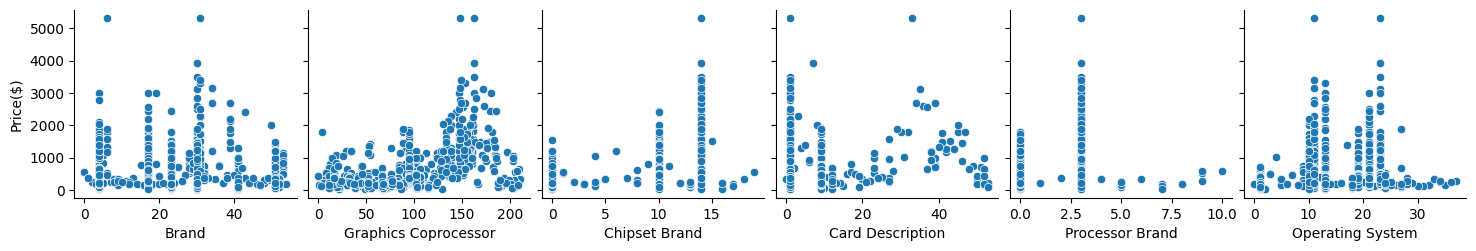

In [79]:
categorical_columns_to_numeric = ["Brand", "Graphics Coprocessor", "Chipset Brand", "Card Description", "Processor Brand", "Operating System"]

sns.pairplot(laptops_df_cleaned, y_vars = "Price($)", x_vars = categorical_columns_to_numeric)
plt.show()

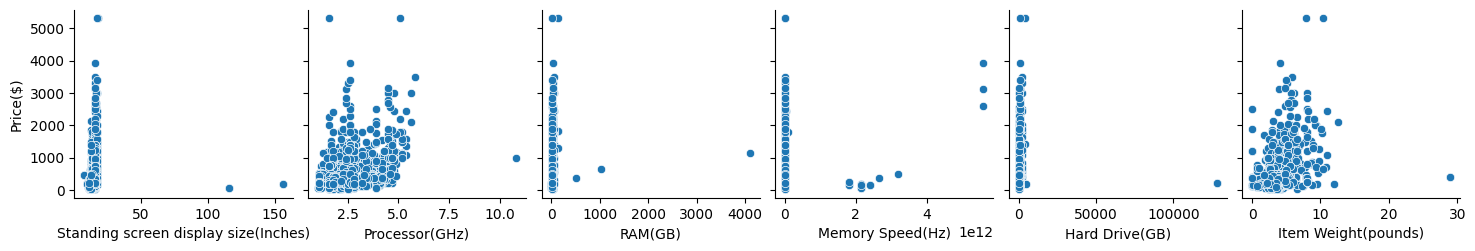

In [80]:
numeric_features_scatter = ["Standing screen display size(Inches)", "Processor(GHz)", "RAM(GB)", "Memory Speed(Hz)", "Hard Drive(GB)", "Item Weight(pounds)"]

sns.pairplot(laptops_df_cleaned, y_vars = "Price($)", x_vars = numeric_features_scatter)
plt.show()

**Understanding Cleaned Dataframe**

In [81]:
laptops_df_cleaned = laptops_df_cleaned.drop("Predicted Price($)", axis = 1)
laptops_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Brand                                 1589 non-null   int32  
 1   Standing screen display size(Inches)  1589 non-null   float64
 2   Processor(GHz)                        1589 non-null   float64
 3   RAM(GB)                               1589 non-null   int64  
 4   Memory Speed(Hz)                      1589 non-null   float64
 5   Hard Drive(GB)                        1589 non-null   float64
 6   Graphics Coprocessor                  1589 non-null   int32  
 7   Chipset Brand                         1589 non-null   int32  
 8   Card Description                      1589 non-null   int32  
 9   Processor Brand                       1589 non-null   int32  
 10  Operating System                      1589 non-null   int32  
 11  Item Weight(pound

In [82]:
laptops_df_cleaned.describe()

,Brand,Standing screen display size(Inches),Processor(GHz),RAM(GB),Memory Speed(Hz),Hard Drive(GB),Graphics Coprocessor,Chipset Brand,Card Description,Processor Brand,Operating System,Item Weight(pounds),Price($)
count,1589.000000,1589.000000,1589.000000,1589.000000,1.589000e+03,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,24.702329,14.972026,2.701246,15.700441,4.480794e+10,615.515772,93.174953,9.185022,9.556325,2.546885,14.034613,3.924764,485.625758
std,12.847051,6.335969,1.136559,106.865229,3.557609e+11,4545.218547,43.452320,4.007047,7.890793,1.289308,7.678731,1.715258,509.537368
min,0.000000,8.000000,1.040000,2.000000,2.100000e+00,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000625,33.880000
25%,17.000000,14.000000,1.800000,4.000000,2.400000e+09,128.000000,72.000000,10.000000,9.000000,3.000000,10.000000,3.100000,190.000000
50%,23.000000,15.600000,2.600000,8.000000,2.666000e+09,256.000000,102.000000,10.000000,9.000000,3.000000,13.000000,3.700000,325.000000
75%,30.000000,15.600000,3.500000,16.000000,3.200000e+09,512.000000,104.000000,10.000000,9.000000,3.000000,21.000000,4.520000,568.990000
max,54.000000,156.000000,10.800000,4096.000000,5.600000e+12,128000.000000,211.000000,19.000000,53.000000,10.000000,37.000000,29.000000,5299.000000


**Linear Regression Model**

In [83]:
X = laptops_df_cleaned.drop(["Price($)"], axis = 1)
y = laptops_df_cleaned["Price($)"]

# Handle outliers by clipping the data to the 1st and 99th percentiles
def clip_outliers(df, columns):
    for col in columns:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = np.clip(df[col], lower, upper)
    return df

X = clip_outliers(X, X.columns)

# Create a pipeline to include polynomial features and standard scaling
pipeline = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 2, include_bias = False)),
    ("scaler", StandardScaler()),
    ("linear_regression", LinearRegression())
])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 93202.59696081873
R^2 Score: 0.6211536890627611


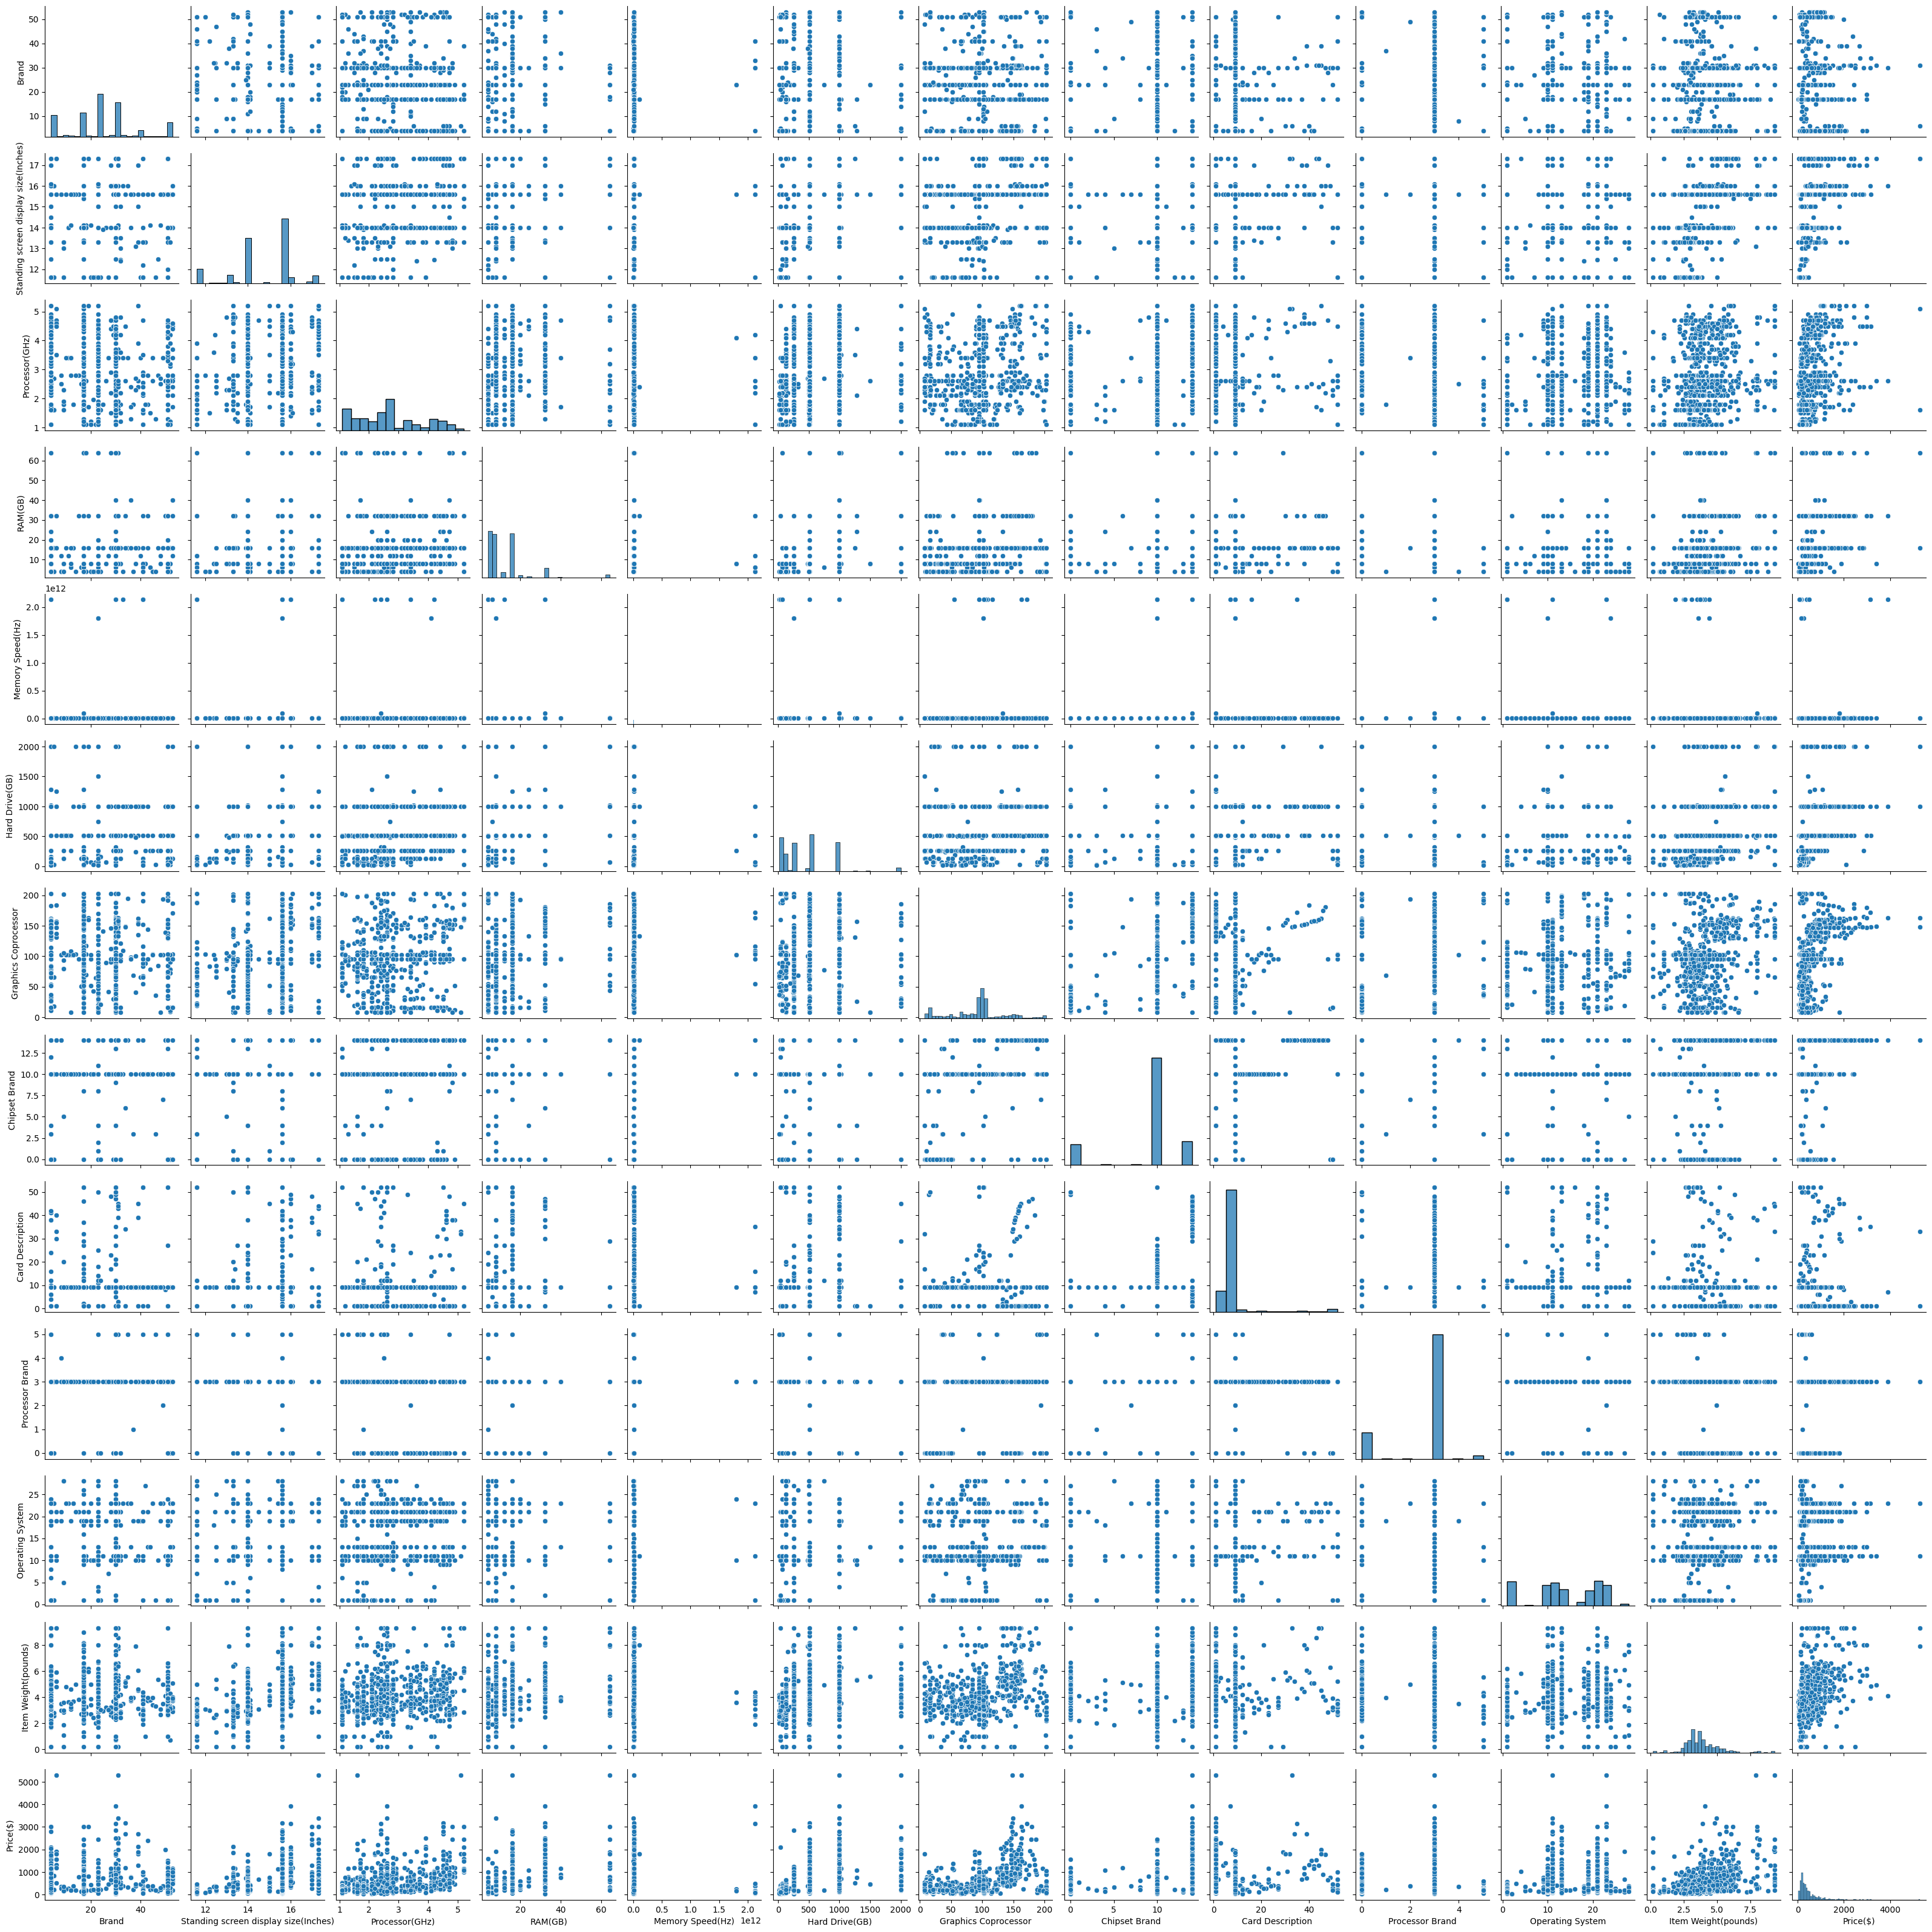

In [84]:
# pairplot
train_data = X_train.copy()
train_data["Price($)"] = y_train
sns.pairplot(train_data)

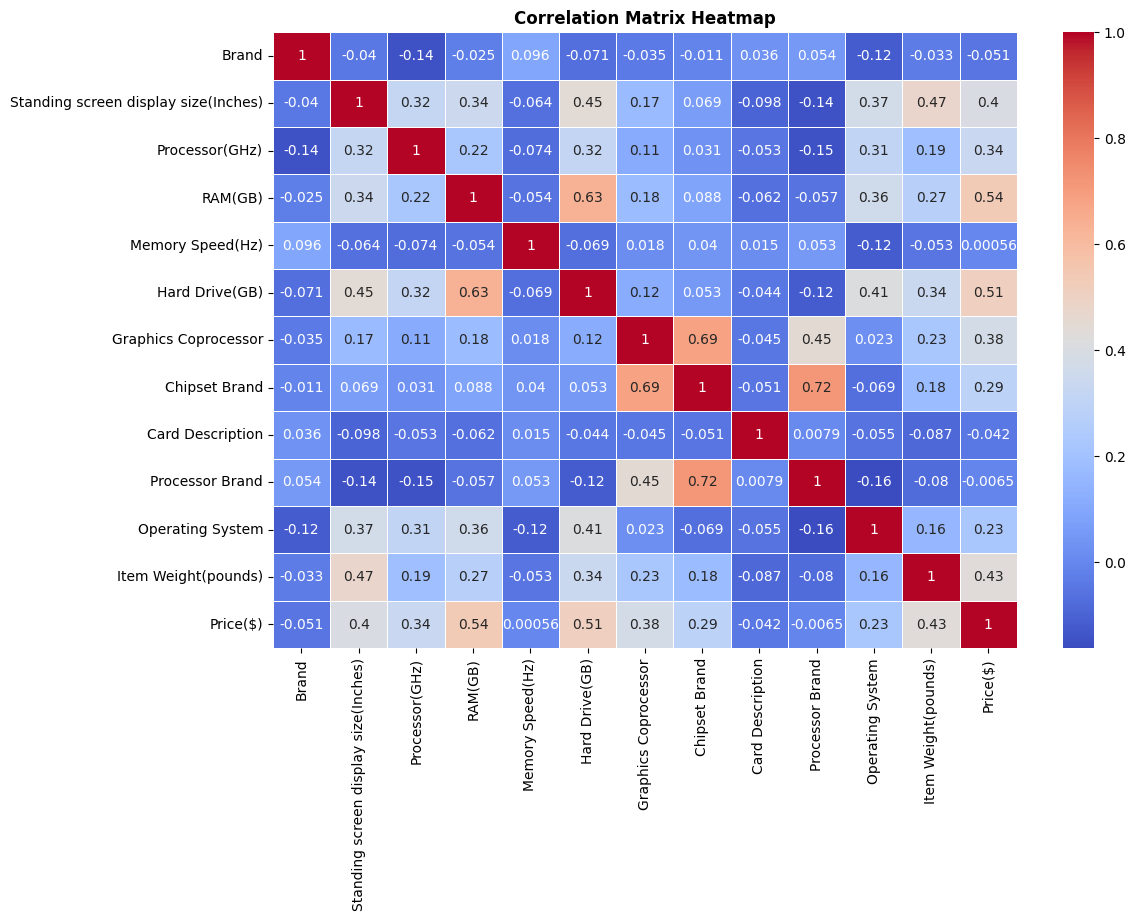

In [85]:
# Heatmap
correlation_matrix = train_data.corr()
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", linewidths = .5)
plt.title("Correlation Matrix Heatmap", fontweight = "bold")
plt.show()

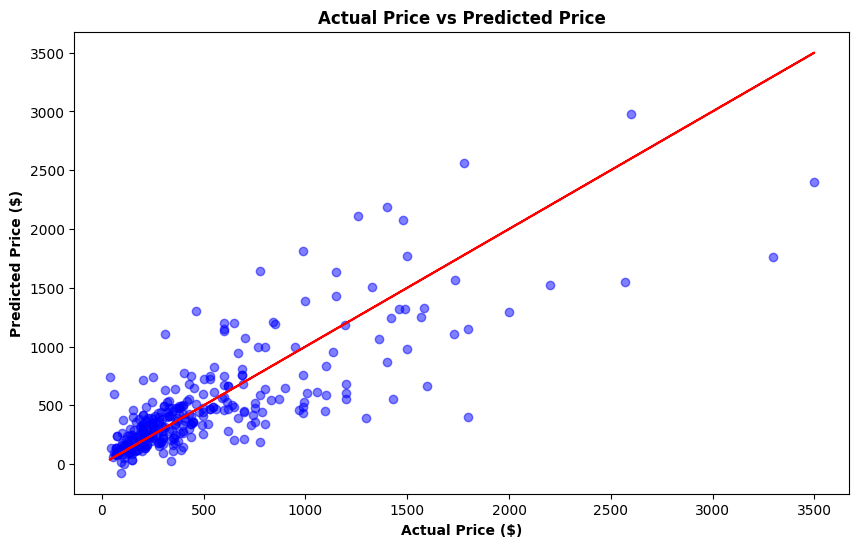

In [86]:
# Scatter plot
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_pred, color = "blue", alpha = 0.5)
plt.plot(y_test, y_test, color = "red")
plt.title("Actual Price vs Predicted Price", fontweight = "bold")
plt.xlabel("Actual Price ($)", fontweight = "bold")
plt.ylabel("Predicted Price ($)", fontweight = "bold")
plt.show()

In [87]:
# Scatter plot using Plotly
actual_prices = y_test
predicted_prices = y_pred

fig = go.Figure()

fig.add_trace(go.Scatter(x = actual_prices, y = predicted_prices, mode = "markers", marker = dict(color = "blue", opacity = 0.5), name = "Actual vs Predicted"))
fig.add_trace(go.Scatter(x = actual_prices, y = actual_prices, mode = "lines", line = dict(color = "red", width = 2), name = "Diagonal Line (y = x)"))
fig.update_layout(
    title = "Actual Price vs Predicted Price (Linear Regression)",
    xaxis_title = "Actual Price ($)",
    yaxis_title = "Predicted Price ($)",
    font = dict(family = "Arial, sans-serif", size = 12, color = "black")
)

fig.show()

**<h1>📌 Test Linear Regression</h1>**

In [88]:
# Sample Data
# Encoded values based on label_mappings
example_data = pd.DataFrame({
    "Brand": [0, 1, 2],
    "Standing screen display size(Inches)": [15.6, 14.0, 13.3],
    "Processor(GHz)": [4.1, 1.1, 1.8],
    "RAM(GB)": [8, 8, 8],
    "Memory Speed(Hz)": [3.2e9, 2.4e9, 1.8e9],
    "Hard Drive(GB)": [128.0, 64.0, 128.0],
    "Graphics Coprocessor": [0, 1, 3],
    "Chipset Brand": [0, 1, 1],
    "Card Description": [0, 0, 0],
    "Processor Brand": [0, 1, 1],
    "Operating System": [0, 1, 4],  
    "Item Weight(pounds)": [3.92, 3.24, 3.0],
    "Price($)": [366.99, 449.99, 374.99],
    "Predicted Price($)": [0, 0, 0]
})

X_example = example_data.drop(["Price($)", "Predicted Price($)"], axis = 1)
y_example = example_data["Price($)"]

imputer = SimpleImputer(strategy = "mean")
X_example_imputed = pd.DataFrame(imputer.fit_transform(X_example), columns = X_example.columns)

y_example_pred = pipeline.predict(X_example_imputed)

example_data["Predicted Price($)"] = y_example_pred
print(example_data[["Brand", "Price($)", "Predicted Price($)"]])

   Brand  Price($)  Predicted Price($)
0      0    366.99          351.654052
1      1    449.99          388.498181
2      2    374.99          356.787720
